<a href="https://colab.research.google.com/github/araldi/HS22_Big-Data-analysis-in-Biomedical-Research/blob/main/Week_07/11_Linear_models_part4_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, we will predict with logistic regression if mushrooms are poisonous or edible. We will test the code here, then convert it to a python script and then submit it to Euler. We will also retrieve the data from Euler (see instruction pptx).

In [109]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

# Identifying poisonous or edible wild mushrooms: a logistic regression model
The raw dataset utilized in this project was sourced from the UCI Machine Learning Repository. The dataset includes categorical characteristics on 8,124 mushroom samples from 23 species of gilled mushrooms.


## Data Preparation

class: poisonous = 'p', edible = 'e'

1.   cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2.   cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: 	bruises=t, no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: 	attached=a, descending=d, free=f, notched=n
7. gill-spacing: 	close=c, crowded=w, distant=d
8. gill-size: 	broad=b, narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: 	enlarging=e, tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-color: brown=n,orange=o,white=w,yellow=y
17. **ring-number: none=n,one=o,two=t**
18. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
19. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
20. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
21. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [110]:
df= pd.read_csv('https://github.com/rashida048/Datasets/raw/master/mushrooms.csv')

In [111]:
df['class'].value_counts().index

Index(['e', 'p'], dtype='object')

Look through the data and see how we can engineer the dataset to make it more fit for analysis.

In [112]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exercise



* find binary features and reassign binary features to 0 and 1 values (including the target feature 'class' = poisonous/edible)
* look for '?' values and reassign to something else (maybe "x"?)
* are there categories with just one value (not descriptive, therefore useless)? drop them
* reassign ring-number values to their true numerical representation -> 0,1,2
* apply one-hot encoding to all features that were not binary or ordinal/numeric

In [114]:
#first look at the df
for col in df.columns:
  print(df[col].value_counts(), "NA = ", df[col].isna().sum())


e    4208
p    3916
Name: class, dtype: int64 NA =  0
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 NA =  0
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 NA =  0
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 NA =  0
f    4748
t    3376
Name: bruises, dtype: int64 NA =  0
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 NA =  0
f    7914
a     210
Name: gill-attachment, dtype: int64 NA =  0
c    6812
w    1312
Name: gill-spacing, dtype: int64 NA =  0
b    5612
n    2512
Name: gill-size, dtype: int64 NA =  0
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 NA =  0
t    4608
e    3516
Name: stalk-shape, dtype: int64 NA =  0
b    3776
?    2480
e    1120
c     556
r     192

In [115]:
to_binary = [] 

for col in df.columns:

  # remove "?"
  if "?" in df[col].value_counts().index:
    print('convert ? values in column ', col)
    conditions = [df[col] == '?']
    choices = ['x']
    df[col] = np.select(conditions, choices, default = df[col])

  # reassign binary columns to 0,1
  elif len(df[col].value_counts()) == 2:
    print('convert this column into binary:', col)
    to_binary.append(col)
    options = list(df[col].value_counts().index)
    conditions = [df[col] == options[0], df[col] == options[1]]
    choices = [0,1]
    df[col] = np.select(conditions, choices)
    
  # drop columns with identical valuse
  elif len(df[col].value_counts()) < 2:
    print('drop this column:', col)
    df = df.drop(columns = [col])

# convert categorical into its corresponding numerical
conditions = [df['ring-number'] == 'n', df['ring-number'] == 'o', df['ring-number'] == 't']
choices = [0,1,2]
df['ring-number'] = np.select(conditions, choices)


convert this column into binary: class
convert this column into binary: bruises
convert this column into binary: gill-attachment
convert this column into binary: gill-spacing
convert this column into binary: gill-size
convert this column into binary: stalk-shape
convert ? values in column  stalk-root
drop this column: veil-type


In [116]:
df['class'].value_counts()


0    4208
1    3916
Name: class, dtype: int64

In [117]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,0,0,1,k,...,s,s,w,w,w,1,p,k,s,u
1,0,x,s,y,1,a,0,0,0,k,...,s,s,w,w,w,1,p,n,n,g
2,0,b,s,w,1,l,0,0,0,n,...,s,s,w,w,w,1,p,n,n,m
3,1,x,y,w,1,p,0,0,1,n,...,s,s,w,w,w,1,p,k,s,u
4,0,x,s,g,0,n,0,1,0,k,...,s,s,w,w,w,1,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,0,n,1,0,0,y,...,s,s,o,o,o,1,p,b,c,l
8120,0,x,s,n,0,n,1,0,0,y,...,s,s,o,o,n,1,p,b,v,l
8121,0,f,s,n,0,n,1,0,0,n,...,s,s,o,o,o,1,p,b,c,l
8122,1,k,y,n,0,y,0,0,1,b,...,s,k,w,w,w,1,e,w,v,l


### One-Hot Encoder

one hot encoding of everything else that is not numerical or binary

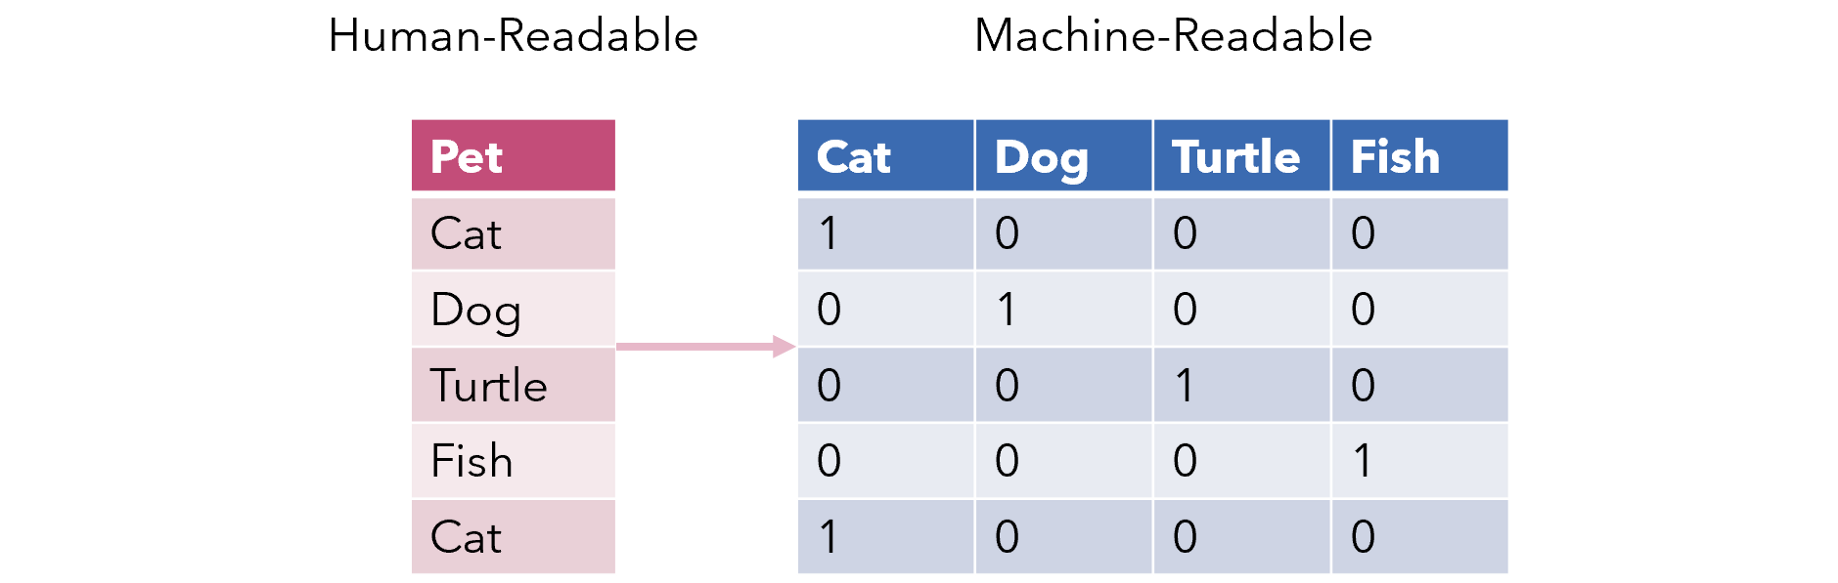

In [118]:
# select what is not binary or numerical

not_to_encode = to_binary + ['ring-number']

to_encode = [i for i in df.columns if i not in not_to_encode]

In [119]:
to_encode

['cap-shape',
 'cap-surface',
 'cap-color',
 'odor',
 'gill-color',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [120]:
# create a new dataframe for ML where the categorical columns are one-hot-encoded

df_ML = df[not_to_encode]
from sklearn import preprocessing
for col in to_encode:
  enc = preprocessing.OneHotEncoder()
  enc.fit(df[[col]])
  one_hot = enc.transform(df[[col]]).toarray()
  new_cols = [col + "_"+ i for i in enc.categories_[0]]
  df_ML[new_cols] = one_hot


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [121]:
df_ML

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_b,cap-shape_c,cap-shape_f,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,1,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,0,0,0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,0,0,1,1,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,1,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0,0,1,0,0,1,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0,0,1,0,0,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,1,0,0,0,1,0,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_ML.to_csv('ML_ready_mushroom.csv', index=False)

In [ ]:
df_ML

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_b,cap-shape_c,cap-shape_f,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,1,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,0,0,0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,0,0,1,1,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,1,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0,0,1,0,0,1,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0,0,1,0,0,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,1,0,0,0,1,0,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Exploratory data analysis

### Exercise

Plot:
* How many poisonous/edible mushrooms
* visualize the class separation of the features (plot each feature subdivided by class type - use sns.countplot with hue)
* Are there correlations between features? Which feature is mostly correlated with class?

Do not forget to add a plt.savefig('namefile.png') and plt.savefig('namefile.svg') at the end of each plot to save them.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


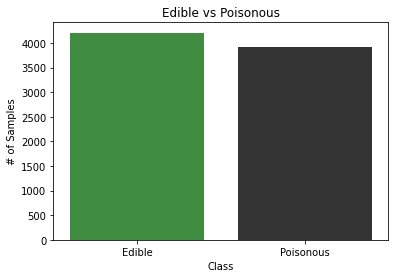

In [102]:
#target variable countplot
#mostly balanced target
plt.figure()
sns.countplot(df['class'], alpha =.80, palette= ['green', 'black'])
plt.title('Edible vs Poisonous')
plt.ylabel('# of Samples')
plt.xlabel('Class')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.savefig('Figure1.svg')
plt.show()

In [103]:
def plot_features(col):
    plt.figure()
    sns.countplot(df[col])
    plt.ylabel('# of samples')
    plt.title('Mushroom' + ' ' + col.title())
    plt.xlabel('Type of' + ' ' + col.title())
    plt.savefig('Figure2_%s.svg' %col)

    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


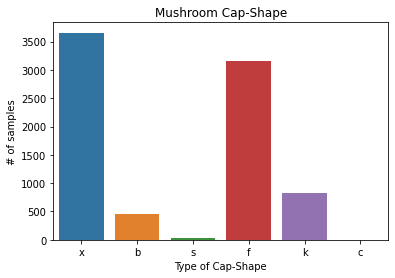

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


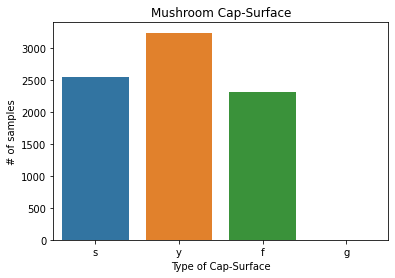

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


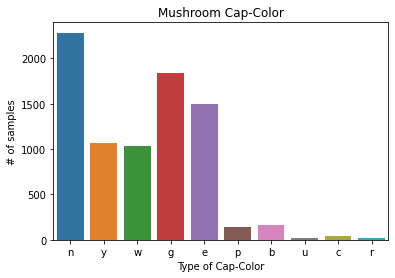

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


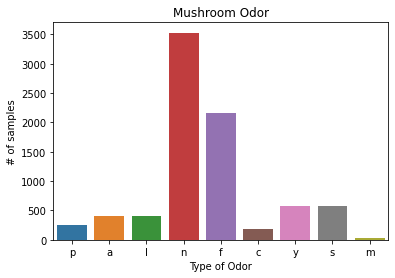

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


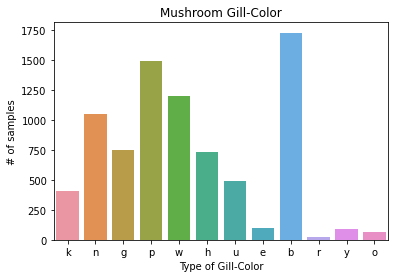

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


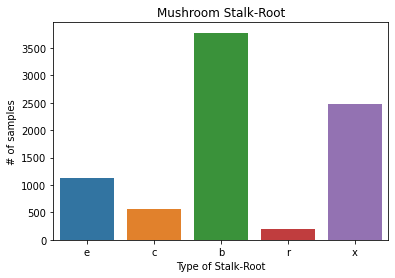

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


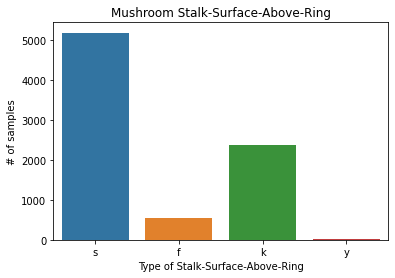

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


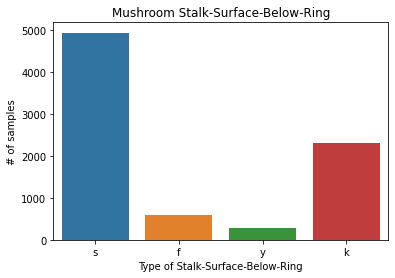

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


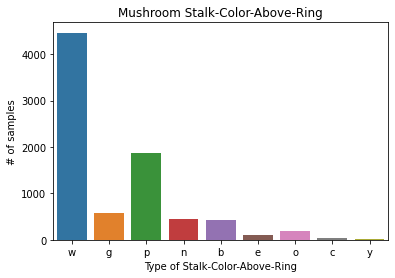

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


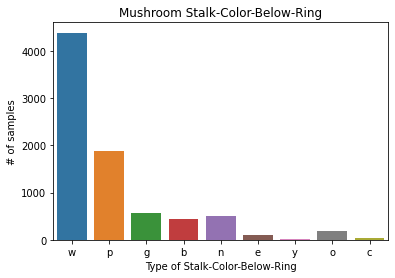

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


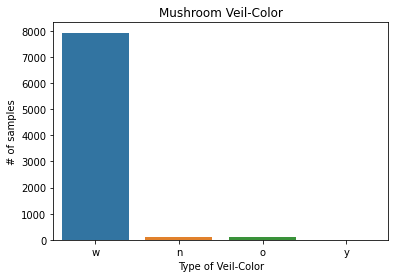

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


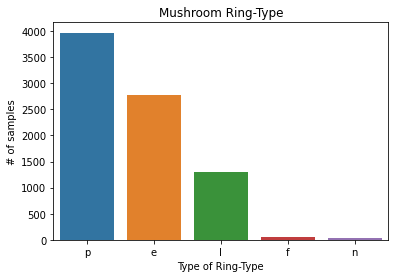

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


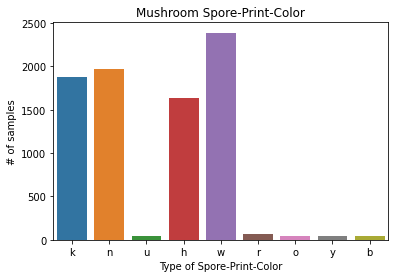

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


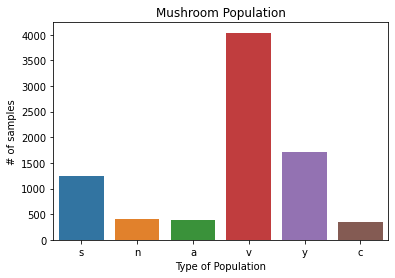

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


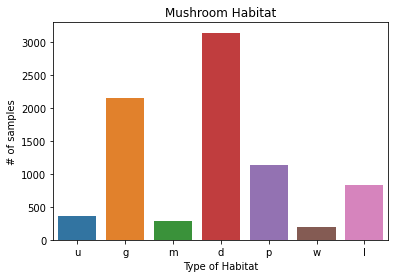

In [104]:
for col in to_encode:
  plot_features(col)

In [105]:
def edible_poisonus_feature_plot(col):
    sns.countplot(col,hue=df['class'],palette=['green', 'black'],data=df)
    plt.ylabel('# of Samples')
    plt.xlabel('Type of' + ' ' + col.title())
    plt.title('Mushroom' + ' ' + col.title())
    plt.legend(title=None,labels=['Edible', 'Poisonous'])
    plt.savefig('Figure3_%s.svg' %col)

    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


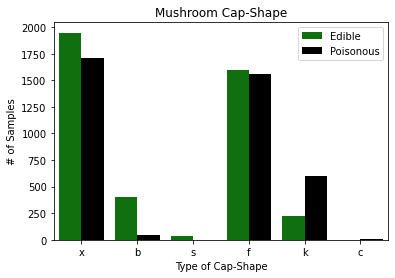

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


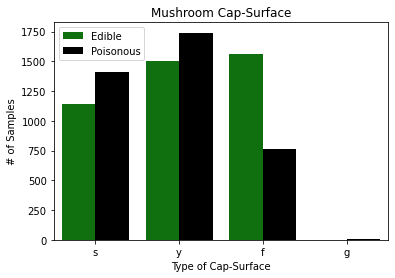

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


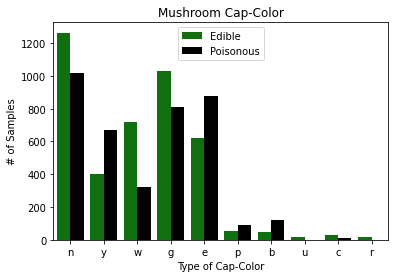

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


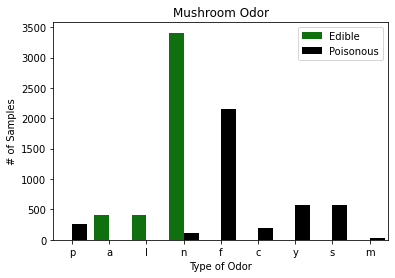

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


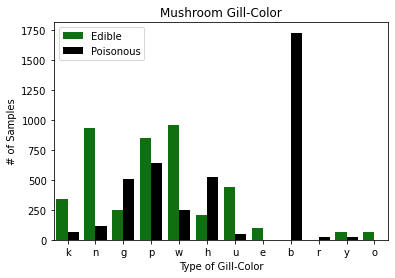

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


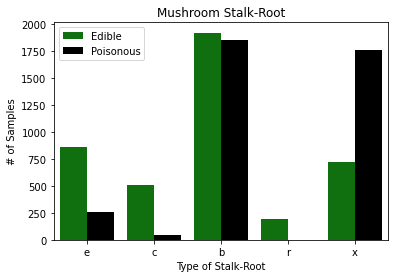

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


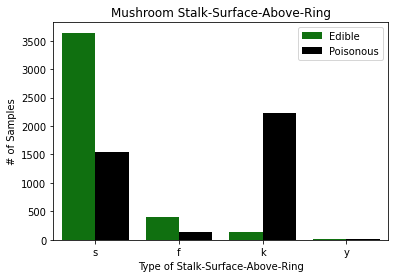

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


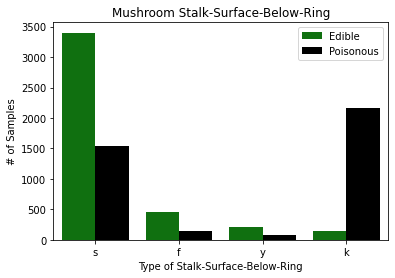

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


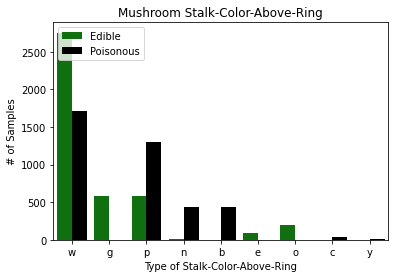

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


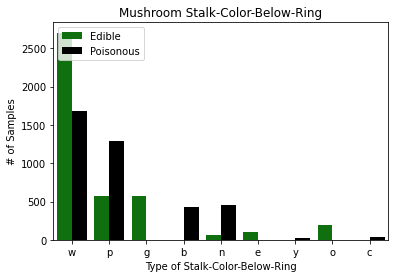

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


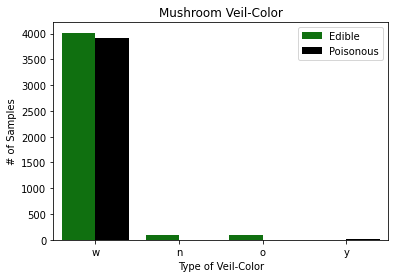

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


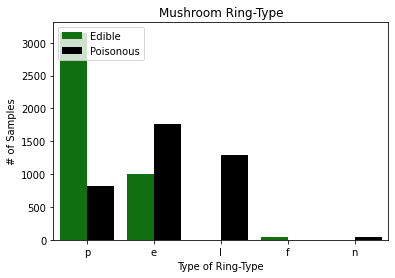

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


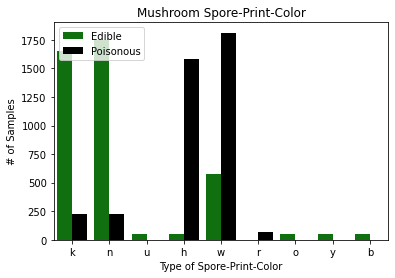

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


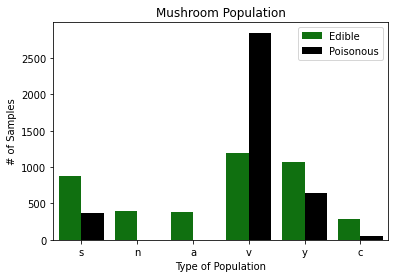

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


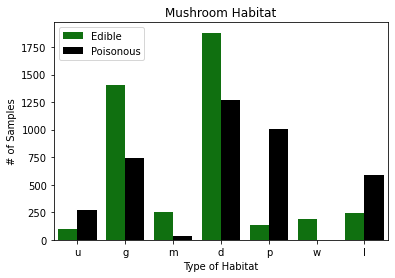

In [106]:
for col in to_encode:
  edible_poisonus_feature_plot(col)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


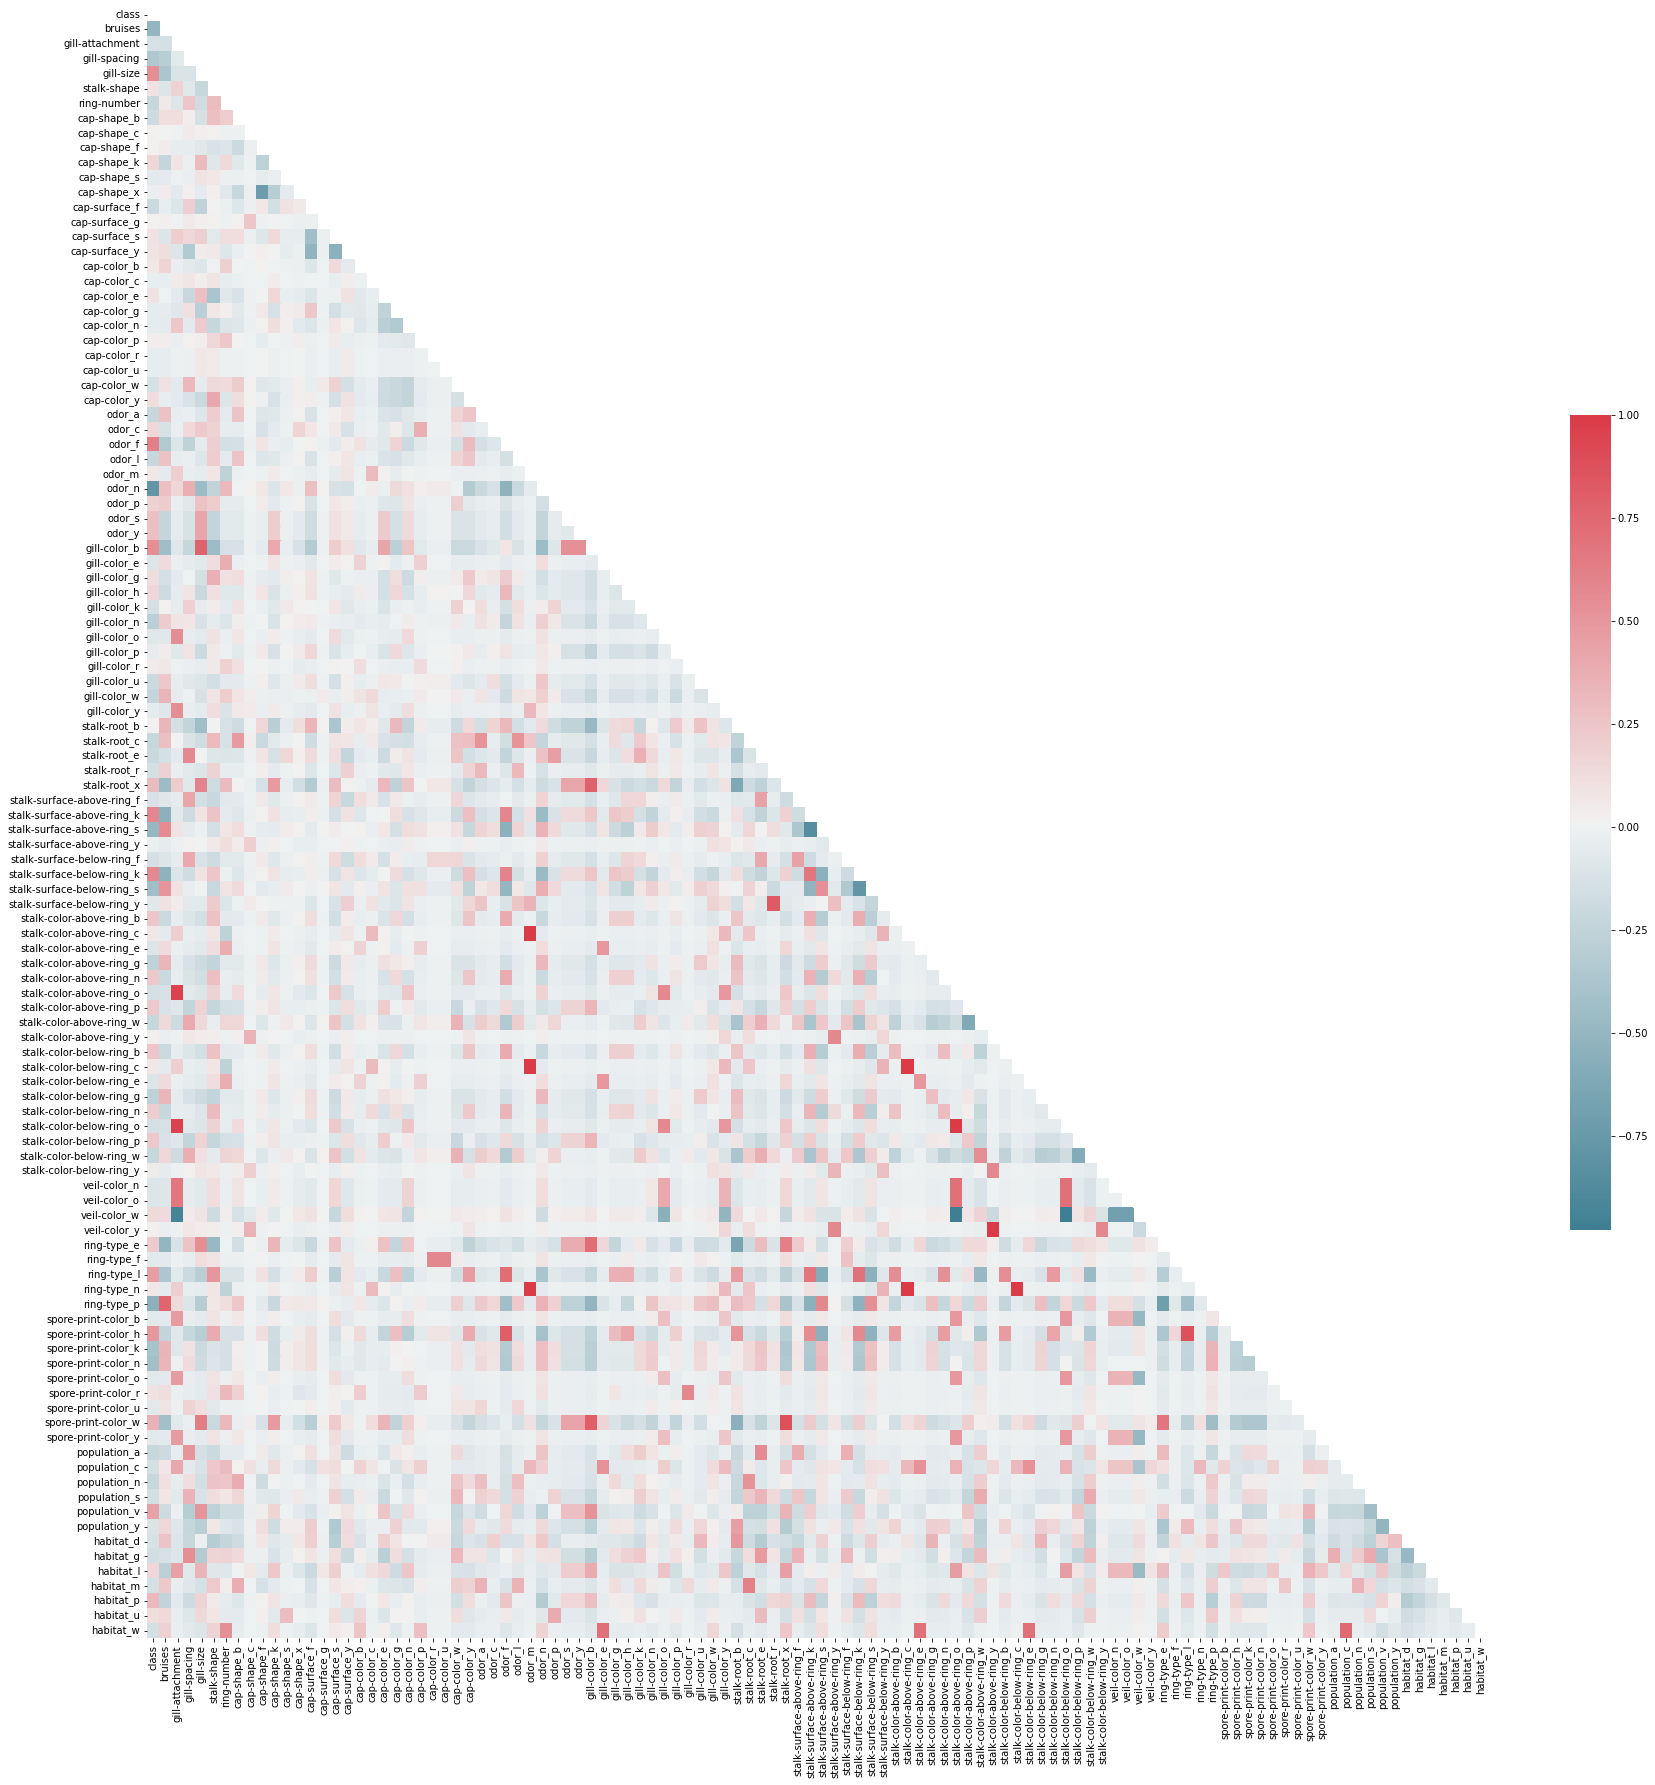

In [107]:
#correlation matrix
corr=df_ML.corr()

#plotting correlation matrix

#plot just half of the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(30, 30))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, mask= mask, vmax=1, cbar_kws={"shrink": .5})
plt.savefig('Figure4.svg')


plt.show()

In [108]:
correlations = corr[abs(corr>.50)]['class']
correlations = correlations[correlations.notna()]
correlations

class                         1.000000
gill-size                     0.540024
odor_f                        0.623842
gill-color_b                  0.538808
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
Name: class, dtype: float64

## Split the dataset for test/train

In [ ]:

#creating test/train split
#scaling not necessary
y=df_ML['class']
X=df_ML.drop(['class'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)
df_train, df_test = train_test_split(df_ML, test_size = 0.20, random_state=2022)

## Logistic regression

In [ ]:

#logreg model
model = LogisticRegression().fit(X_train,y_train)


In [ ]:
from sklearn.metrics import accuracy_score,precision_score

y_pred = model.predict(X_train)

print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred)))
print('Precision Score : ' + str(precision_score(y_train,y_pred)))


#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_train,y_pred)))

Accuracy Score : 1.0
Precision Score : 1.0
Confusion Matrix : 
[[3377    0]
 [   0 3122]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


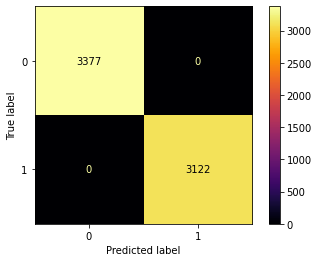

In [ ]:
plot_confusion_matrix(model,X_train,y_train,cmap='inferno',values_format='g')
#save file
plt.show()

In [ ]:

descriptors = []
y_pred = model.predict(X_test)
accuracy = 'Accuracy Score : ' + str(accuracy_score(y_test,y_pred))
precision ='Precision Score : ' + str(precision_score(y_test,y_pred))
print(accuracy)
print(precision)


#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
cm = 'Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred))
print(cm)

descriptors = [accuracy, precision, cm]

Accuracy Score : 0.9993846153846154
Precision Score : 1.0
Confusion Matrix : 
[[831   0]
 [  1 793]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


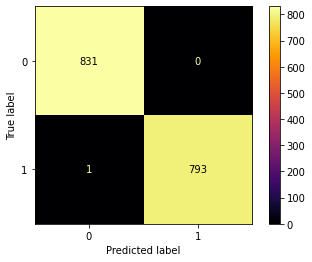

In [ ]:
plot_confusion_matrix(model,X_test,y_test,cmap='inferno',values_format='g')
#save file
plt.show()

In [ ]:
# write the output somewhere

with open("descriptors_logistic_regression.txt", "w") as file:
    file_lines = "\n".join(descriptors)
    file.write(file_lines)



In [ ]:
# save the coefficients
logistic_coef = LogisticRegression().fit(X,y).coef_.flatten()
coeff = [i for i in df_ML.columns if 'class' not in i]

dict_coef = dict(zip(coeff, logistic_coef))

import json

# Serialize data into file:
json.dump( dict_coef, open( "logistic_regression_coefficients.json", 'w' ) )


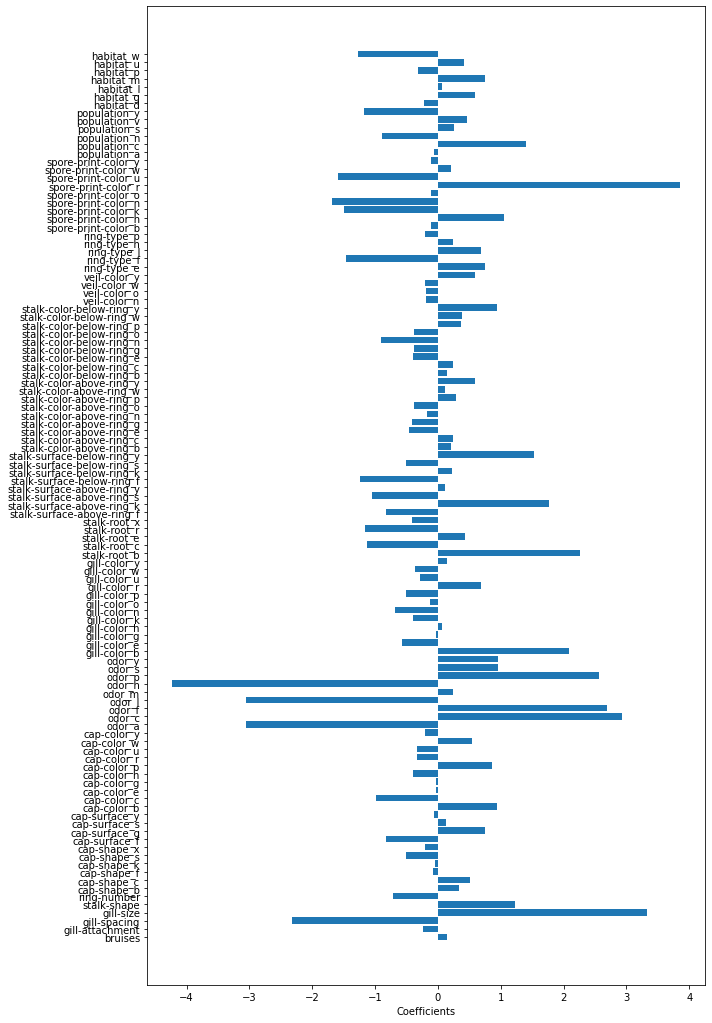

In [ ]:
plt.figure(figsize =(10,18))
plt.barh(coeff, logistic_coef)
plt.xlabel("Coefficient values")
plt.xlabel("Coefficients")
plt.show()

In [ ]:
dict_coef

{'bruises': 0.14526811540311066,
 'gill-attachment': -0.2421182571459976,
 'gill-spacing': -2.330324537085014,
 'gill-size': 3.3224977074270288,
 'stalk-shape': 1.2237290188411756,
 'ring-number': -0.7150335491225146,
 'cap-shape_b': 0.3281266134477445,
 'cap-shape_c': 0.5153812199335132,
 'cap-shape_f': -0.08091360469226273,
 'cap-shape_k': -0.04779193208589464,
 'cap-shape_s': -0.5139421754301419,
 'cap-shape_x': -0.20110251487126862,
 'cap-surface_f': -0.8249687917297058,
 'cap-surface_g': 0.7565785627148174,
 'cap-surface_s': 0.13307236415456986,
 'cap-surface_y': -0.06492452883799102,
 'cap-color_b': 0.9449434554578295,
 'cap-color_c': -0.9910304080655159,
 'cap-color_e': -0.027829199779158407,
 'cap-color_g': -0.036514679229890726,
 'cap-color_n': -0.3986009399289276,
 'cap-color_p': 0.8666062310219124,
 'cap-color_r': -0.34082803069628786,
 'cap-color_u': -0.3408280306962879,
 'cap-color_w': 0.5366017595490724,
 'cap-color_y': -0.21276255133106117,
 'odor_a': -3.0556001229542407

## Determining the most predictive features with Lasso regression

Lasso regression is a type of linear regression which is used to prevent overfitting of data by penalizing high linear coefficients. 

It also tends to **drop coefficients of unimportant variables to exactly zero**, which allows to identify the most important variables in high dimensional problems. 

Alpha is a parameter which sets the degree penalty for the covariate coefficients. The higher the alpha, the less sensitive Lasso will be to the data, the more variables coefficients will tend towards zero.


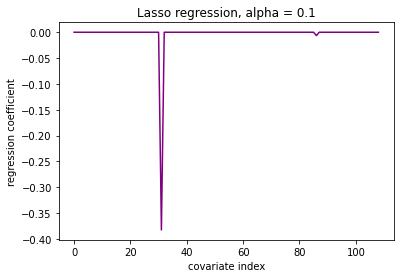

In [ ]:
#import modules
from sklearn.linear_model import Lasso
x = df_ML[[i for i in df_ML.columns if 'class' not in i]]
y = df_ML['class']

#create model, set alpha
lasso = Lasso(alpha = 0.1)

#fit model, access coef_ attribute: lasso_coef
lasso_coef = lasso.fit(x,y).coef_

#create plot
plt.plot(range(len(x.columns)), lasso_coef, c='purple')
plt.title("Lasso regression, alpha = 0.1")
plt.xlabel('covariate index')
plt.ylabel('regression coefficient')

plt.show()

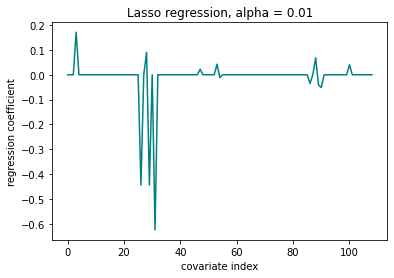

In [ ]:
#create model, changre alpha
lasso = Lasso(alpha = 0.01)

#fit model, access coef_ attribute: lasso_coef
lasso_coef_01 = lasso.fit(x,y).coef_

#create plot
plt.plot(range(len(x.columns)), lasso_coef_01, c='teal')
plt.title("Lasso regression, alpha = 0.01")
plt.xlabel('covariate index')
plt.ylabel('regression coefficient')

plt.show()

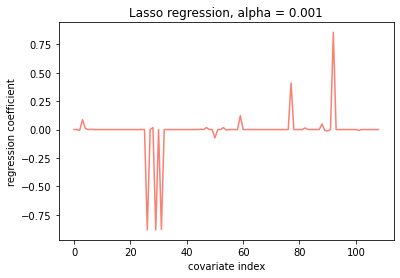

In [ ]:
#create model, changre alpha
lasso = Lasso(alpha = 0.001)

#fit model, access coef_ attribute: lasso_coef
lasso_coef_001 = lasso.fit(x,y).coef_

#create plot
plt.plot(range(len(x.columns)), lasso_coef_001, c='salmon')
plt.title("Lasso regression, alpha = 0.001")
plt.xlabel('covariate index')
plt.ylabel('regression coefficient')

plt.show()

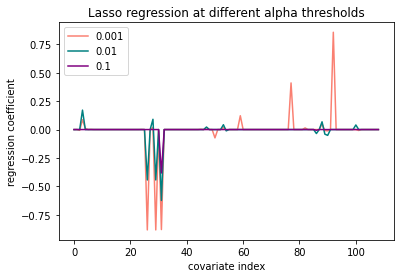

In [ ]:
plt.plot(range(len(x.columns)), lasso_coef_001, label='0.001', c='salmon')
plt.plot(range(len(x.columns)), lasso_coef_01, label='0.01', c='teal')
plt.plot(range(len(x.columns)), lasso_coef, label='0.1', c='purple')

plt.title("Lasso regression at different alpha thresholds")
plt.xlabel('covariate index')
plt.ylabel('regression coefficient')

plt.legend()

plt.show()

In [ ]:
# compare the lasso coefficient with the logistic regressionc coefficient
logistic_coef = LogisticRegression().fit(x,y).coef_

comparison_lasso_logistic = pd.DataFrame({'Lasso alpha 0.1' : lasso_coef.flatten(), 
                                          'Lasso alpha 0.01' : lasso_coef_01.flatten(),
                                          'Lasso alpha 0.001' : lasso_coef_001.flatten(),
                                          "Logistic": logistic_coef.flatten()}, index = [i for i in df_ML.columns if 'class' not in i])

In [ ]:
comparison_lasso_logistic

,Lasso alpha 0.1,Lasso alpha 0.01,Lasso alpha 0.001,Logistic
bruises,-0.0,-0.000451,0.000000,0.145268
gill-attachment,-0.0,-0.000000,-0.000000,-0.242118
gill-spacing,-0.0,-0.000000,-0.006868,-2.330325
gill-size,0.0,0.171255,0.087160,3.322498
stalk-shape,0.0,0.000000,0.010095,1.223729
...,...,...,...,...
habitat_l,0.0,0.000000,0.000000,0.061946
habitat_m,-0.0,-0.000000,0.000000,0.745476
habitat_p,0.0,0.000000,-0.000000,-0.316959
habitat_u,0.0,0.000000,0.000000,0.409931


Text(0.5, 1.0, 'comparison between \nlogistic regression coefficients vs lasso coefficients at different alpha thresholds')

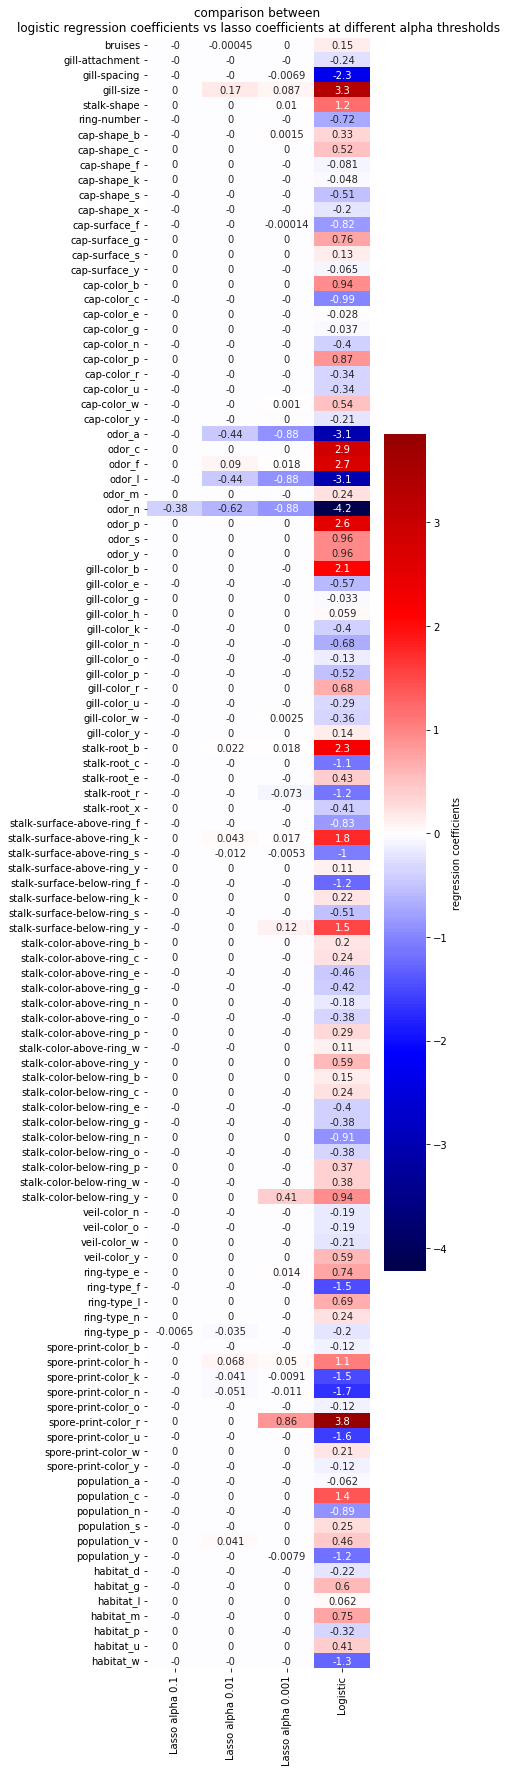

In [ ]:
plt.figure(figsize = (5,30))
sns.heatmap(comparison_lasso_logistic, center=0, 
            annot=True, cmap="seismic", # choose a diverging colormap! #https://matplotlib.org/stable/tutorials/colors/colormaps.html
            cbar_kws={'label': 'regression coefficients'}) 
plt.title("comparison between \nlogistic regression coefficients vs lasso coefficients at different alpha thresholds")

What happens when we use statsmodels?

In [ ]:
import statsmodels.api as sm

X_train_constant = sm.add_constant(X_train)
logit_mod = sm.Logit(y_train.values, X_train_constant)

logit_mod = logit_mod.fit()
logit_mod.summary()

# singular matrix means that the separation is complete

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


         Current function value: inf
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: ignored

### Recursive feature elimination (RFE)

In [ ]:
# A feature selection method: recursive feature elimination (RFE)
from sklearn.feature_selection import RFE

model = LogisticRegression()
model.fit(X_train, y_train)



rfe = RFE(model, n_features_to_select=10)    # Select how many features         
rfe = rfe.fit(X_train, y_train)

In [ ]:
ranking_RFE = pd.DataFrame(columns = ['column name', 'ranking'])
ranking_RFE['column name'] = X_train.columns
ranking_RFE['ranking'] = rfe.ranking_
ranking_RFE.sort_values(by='ranking', ascending = False, inplace= True)

Text(0, 0.5, 'Features')

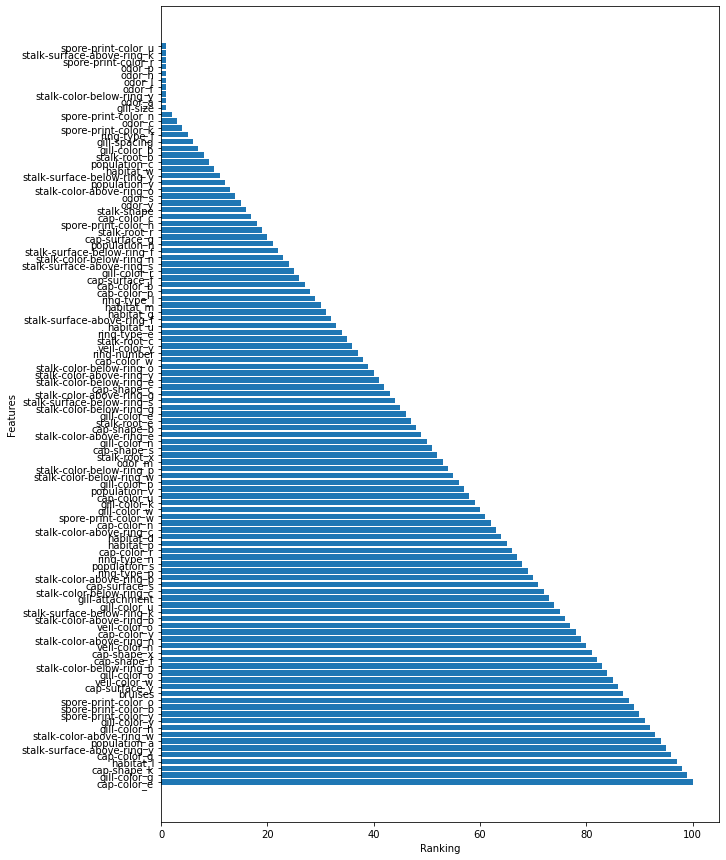

In [ ]:
plt.figure(figsize=(10,15))
plt.barh(ranking_RFE['column name'], ranking_RFE['ranking'])
plt.xlabel('Ranking')
plt.ylabel('Features')

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('bruises', False, 87),
 ('gill-attachment', False, 73),
 ('gill-spacing', False, 6),
 ('gill-size', True, 1),
 ('stalk-shape', False, 16),
 ('ring-number', False, 37),
 ('cap-shape_b', False, 48),
 ('cap-shape_c', False, 42),
 ('cap-shape_f', False, 82),
 ('cap-shape_k', False, 98),
 ('cap-shape_s', False, 51),
 ('cap-shape_x', False, 81),
 ('cap-surface_f', False, 26),
 ('cap-surface_g', False, 20),
 ('cap-surface_s', False, 71),
 ('cap-surface_y', False, 86),
 ('cap-color_b', False, 27),
 ('cap-color_c', False, 17),
 ('cap-color_e', False, 100),
 ('cap-color_g', False, 96),
 ('cap-color_n', False, 62),
 ('cap-color_p', False, 28),
 ('cap-color_r', False, 66),
 ('cap-color_u', False, 58),
 ('cap-color_w', False, 38),
 ('cap-color_y', False, 78),
 ('odor_a', True, 1),
 ('odor_c', False, 3),
 ('odor_f', True, 1),
 ('odor_l', True, 1),
 ('odor_m', False, 53),
 ('odor_n', True, 1),
 ('odor_p', True, 1),
 ('odor_s', False, 14),
 ('odor_y', False, 15),
 ('gill-color_b', False, 7),
 ('gill

In [ ]:
import sklearn

y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9827602930522844


## Cross Validation

We can check the goodness of the model through cross-validation.



If coefficients, and fit of the model, vary significantly when changing the input dataset the robustness of the model is not guaranteed, and it should probably be interpreted with caution.

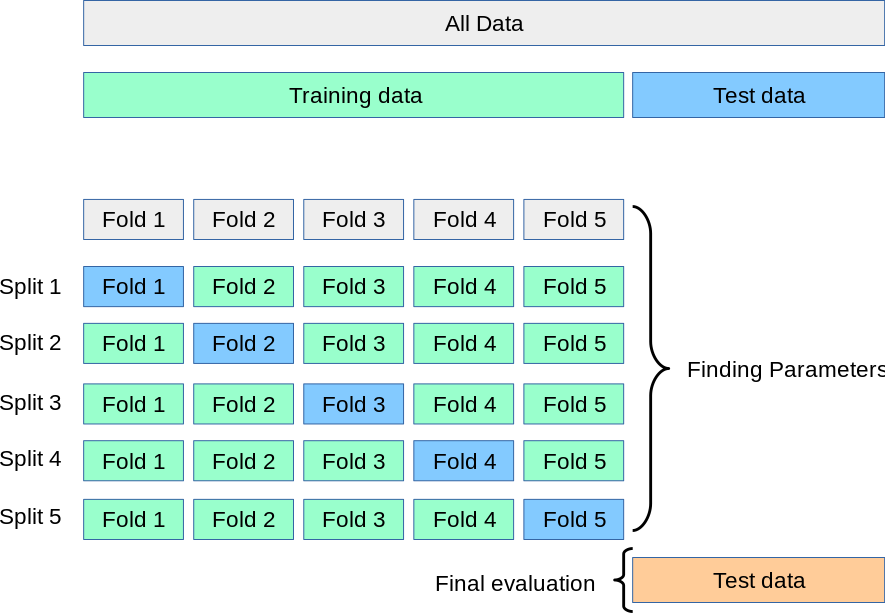

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model = LogisticRegression().fit(X_train,y_train)
scores = cross_val_score(model, X_train,y_train, cv=10, scoring='accuracy')
scores

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99846154, 1.        , 1.        , 0.99692308, 1.        ])

In [ ]:
scores.mean()

0.9995384615384616

In [ ]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))


0.9995 accuracy with a standard deviation of 0.0010


In [ ]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores.mean()

-0.0004615384615384615

## Another way to obtain the most predictive model: Grid Search Cross-Validation

In [ ]:
print([i for i in range(2, 14, 2)])

[2, 4, 6, 8, 10, 12]


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# step-1: create a cross-validation scheme

# KFold
# We divide our data into k folds 
# and run a for loop for k times taking one fold at a time as a test dataset in each iteration 
# and calculate average error rate (or accuracy) in the end.

folds = KFold(n_splits = 5, shuffle = True, random_state = 2022)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(2, 14,2 ))}]


# step-3: perform grid search
# 3.1 specify model

model = LogisticRegression()
model.fit(X_train, y_train)
rfe = RFE(model)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=RFE(estimator=LogisticRegression()),
             param_grid=[{'n_features_to_select': [2, 4, 6, 8, 10, 12]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.749750,0.745057,0.006096,0.001779,2,{'n_features_to_select': 2},-0.801862,0.741092,0.734893,0.732308,...,0.142809,0.727457,6,-0.672539,0.764218,0.765766,0.762460,-0.698978,0.184185,0.710356
1,7.369610,0.582479,0.005000,0.000180,4,{'n_features_to_select': 4},0.975232,0.978424,0.975339,0.981538,...,0.980257,0.005737,5,0.981519,0.980737,0.981508,0.979948,0.977655,0.980273,0.001432
2,7.310237,0.667225,0.004920,0.000096,6,{'n_features_to_select': 6},0.984520,0.978424,0.975339,0.981538,...,0.982115,0.005296,4,0.989989,0.980737,0.981508,0.979948,0.977655,0.981967,0.004213
3,6.920107,0.098605,0.005164,0.000305,8,{'n_features_to_select': 8},0.984520,1.000000,0.987669,0.996923,...,0.992589,0.005737,1,0.989989,0.995377,0.996147,0.993830,0.994606,0.993990,0.002144
4,7.603735,0.809857,0.005096,0.000105,10,{'n_features_to_select': 10},0.984520,1.000000,0.987669,0.996923,...,0.992589,0.005737,1,0.989989,0.993065,0.996147,0.993830,0.994606,0.993528,0.002042
5,7.189392,0.600774,0.005134,0.000319,12,{'n_features_to_select': 12},0.984520,1.000000,0.987669,0.996923,...,0.992589,0.005737,1,0.989989,0.993065,0.996147,0.993830,0.994606,0.993528,0.002042


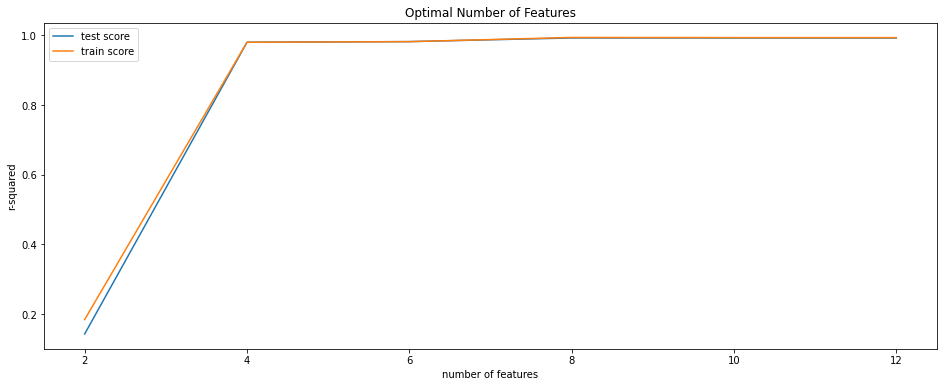

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
# final model
n_features_optimal = 10

rfe = RFE(model, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict poisonus/edible mushrooms of X_test with optimal number of features
y_pred = model.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9975371847217549


## More linear model examples here:
https://scikit-learn.org/stable/modules/linear_model.html